# Product Category

In [1]:
import pandas as pd 
import regex as re
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import random
%matplotlib inline

In [2]:
#Load the datasets:
items_order = pd.read_csv('olist_order_items_dataset.csv')
payments_order = pd.read_csv('olist_order_payments_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
productsTranslation=pd.read_csv('product_category_name_translation.csv')

In [3]:
items_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [4]:
items_order.duplicated().sum()


np.int64(0)

In [5]:
#Convert order_item_id to string object
items_order["order_item_id"] = items_order['order_item_id'].astype('str')

#Convert shipping_limit_date to datetime
items_order["shipping_limit_date"] = pd.to_datetime(items_order["shipping_limit_date"])

In [6]:
#Confirm the datatype change
items_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  object        
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.0+ MB


In [7]:
payments_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [8]:
payments_order.duplicated().sum()

np.int64(0)

In [9]:
payments_order.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [10]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [11]:
orders.duplicated().sum()


np.int64(0)

In [12]:
#Check orders df for null values()
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [13]:
#Update timestamp columns to the correct datatype
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [14]:
#Confirm the datatype change for timestamp coolumns
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [15]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [16]:
products.duplicated().sum()


np.int64(0)

In [17]:
#Check orders df for null values()
products.isna().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

In [18]:
productsTranslation.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


In [19]:
#Create Master df
Master_df = orders.merge(payments_order, on="order_id") \
.merge(items_order, on="order_id")\
.merge(products, on='product_id')\
.merge(productsTranslation, on='product_category_name')
#Confirm shape and datatype of master df
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115878 entries, 0 to 115877
Data columns (total 27 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       115878 non-null  object        
 1   customer_id                    115878 non-null  object        
 2   order_status                   115878 non-null  object        
 3   order_purchase_timestamp       115878 non-null  datetime64[ns]
 4   order_approved_at              115864 non-null  datetime64[ns]
 5   order_delivered_carrier_date   114673 non-null  datetime64[ns]
 6   order_delivered_customer_date  113383 non-null  datetime64[ns]
 7   order_estimated_delivery_date  115878 non-null  datetime64[ns]
 8   payment_sequential             115878 non-null  int64         
 9   payment_type                   115878 non-null  object        
 10  payment_installments           115878 non-null  int64         
 11  

In [20]:
Master_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,payment_sequential,payment_type,...,freight_value,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,1,credit_card,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,3,voucher,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,2,voucher,...,8.72,utilidades_domesticas,40.0,268.0,4.0,500.0,19.0,8.0,13.0,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,1,boleto,...,22.76,perfumaria,29.0,178.0,1.0,400.0,19.0,13.0,19.0,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,1,credit_card,...,19.22,automotivo,46.0,232.0,1.0,420.0,24.0,19.0,21.0,auto


In [21]:
#Check for duplicate rows
Master_df.duplicated().sum()
#Drop duplicate rows if any
Master_df.drop_duplicates(inplace=True)

#Confirm there are no duplicate rows
Master_df.duplicated().sum()

np.int64(0)

In [22]:
#Checking null values
Master_df.isnull().sum()


order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  14
order_delivered_carrier_date     1205
order_delivered_customer_date    2495
order_estimated_delivery_date       0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
product_category_name               0
product_name_lenght                 0
product_description_lenght          0
product_photos_qty                  0
product_weight_g                    1
product_length_cm                   1
product_height_cm                   1
product_width_cm                    1
product_cate

In [23]:
# Drop rows with null values
Master_df.dropna(inplace=True)

In [24]:
#Checking null values again
Master_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g                 0
product_length_cm                0
product_height_cm                0
product_width_cm                 0
product_category_name_english    0
dtype: int64

In [25]:
#Count how many products category
category_counts = Master_df['product_category_name_english'].value_counts()

# Display the counts
print(category_counts)

product_category_name_english
bed_bath_table               11649
health_beauty                 9761
sports_leisure                8731
furniture_decor               8553
computers_accessories         7897
                             ...  
arts_and_craftmanship           24
la_cuisine                      16
cds_dvds_musicals               14
fashion_childrens_clothes        7
security_and_services            2
Name: count, Length: 71, dtype: int64


C:\Users\Chan Kok Han\AppData\Local\Temp\ipykernel_31684\2991679928.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_value', y='product_category_name_english', data=category_payment, palette='viridis')


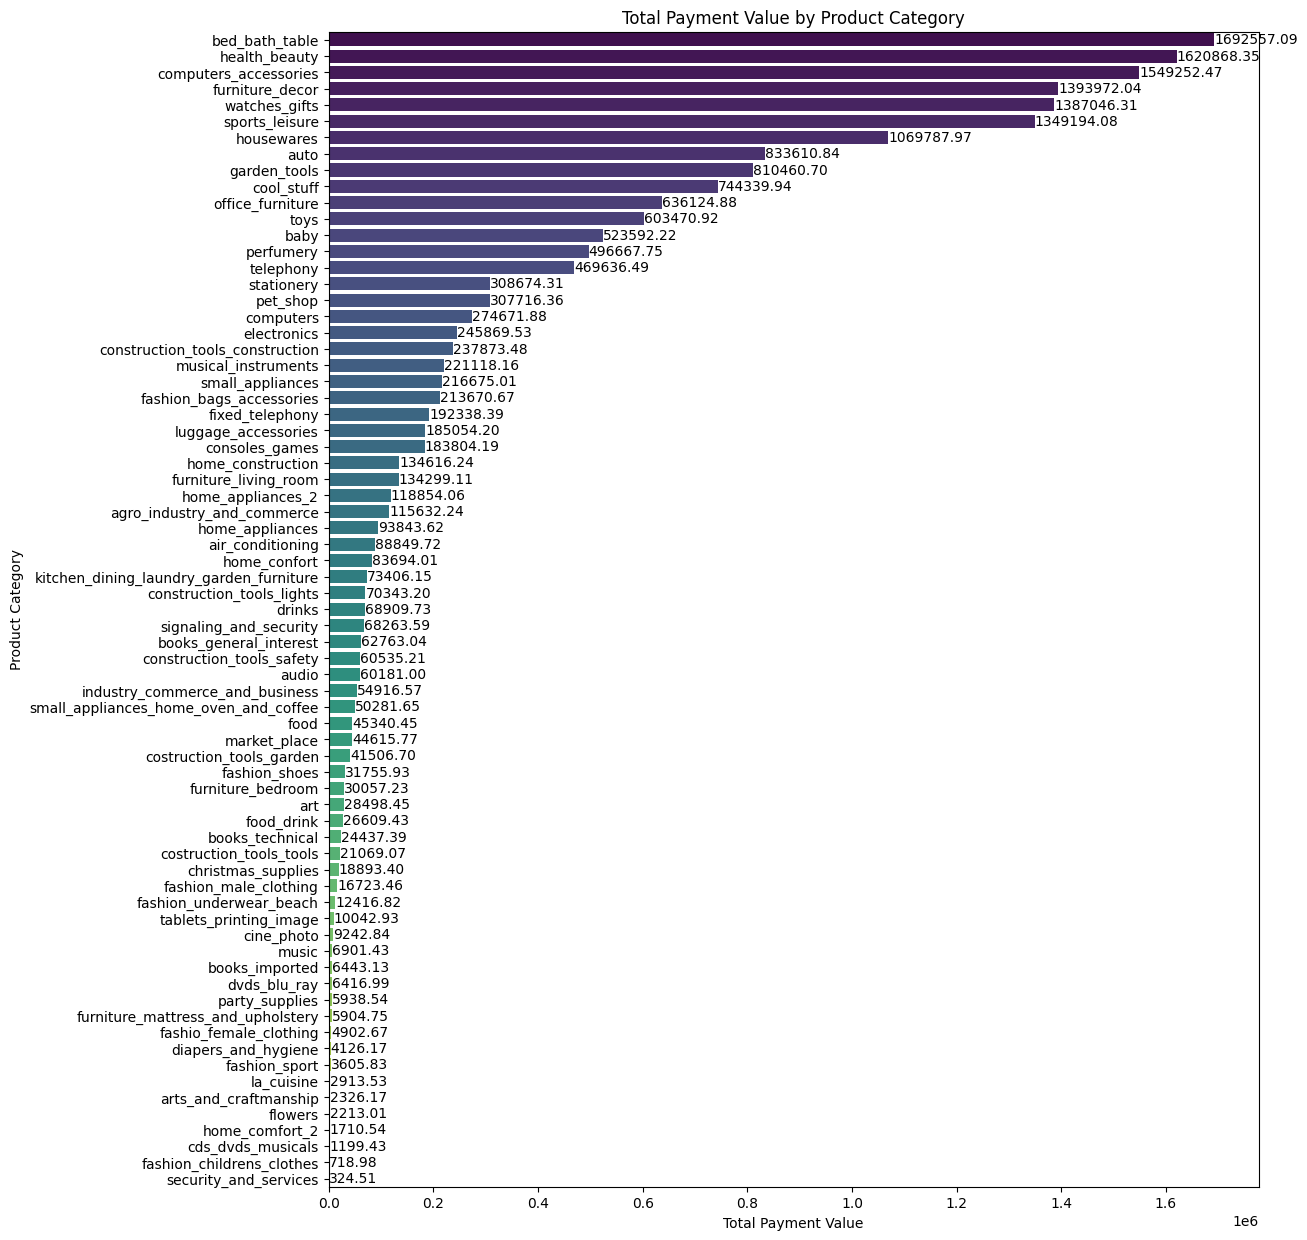

In [26]:
# Group by product category and calculate total payment value
category_payment = Master_df.groupby('product_category_name_english')['payment_value'].sum().reset_index()

# Sort categories by total payment value
category_payment = category_payment.sort_values(by='payment_value', ascending=False)

# Visualize the distribution of payment values for each product category
plt.figure(figsize=(12, 15))
sns.barplot(x='payment_value', y='product_category_name_english', data=category_payment, palette='viridis')

# Add hover information using annotate
for index, value in enumerate(category_payment['payment_value']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')

plt.title('Total Payment Value by Product Category')
plt.xlabel('Total Payment Value')
plt.ylabel('Product Category')
plt.show()


C:\Users\Chan Kok Han\AppData\Local\Temp\ipykernel_31684\2345455053.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='payment_value', y='product_category_name_english', data=top_categories, palette='viridis')


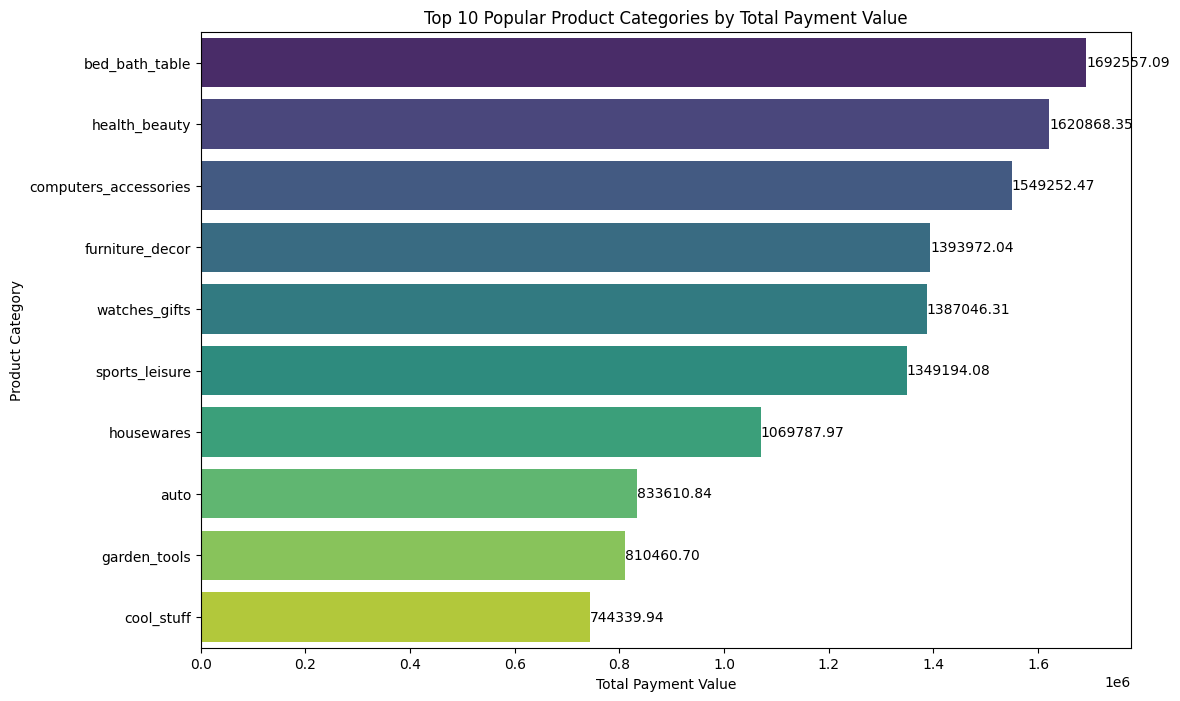

In [27]:

# Group by product category and calculate total payment value
category_payment = Master_df.groupby('product_category_name_english')['payment_value'].sum().reset_index()

# Sort categories by total payment value
category_payment = category_payment.sort_values(by='payment_value', ascending=False)

# Select the top 10 categories
top_categories = category_payment.head(10)

# Visualize the distribution of payment values for each product category
plt.figure(figsize=(12, 8))
sns.barplot(x='payment_value', y='product_category_name_english', data=top_categories, palette='viridis')

# Add hover information using annotate
for index, value in enumerate(top_categories['payment_value']):
    plt.text(value, index, f'{value:.2f}', ha='left', va='center', fontsize=10, color='black')

plt.title('Top 10 Popular Product Categories by Total Payment Value')
plt.xlabel('Total Payment Value')
plt.ylabel('Product Category')
plt.show()


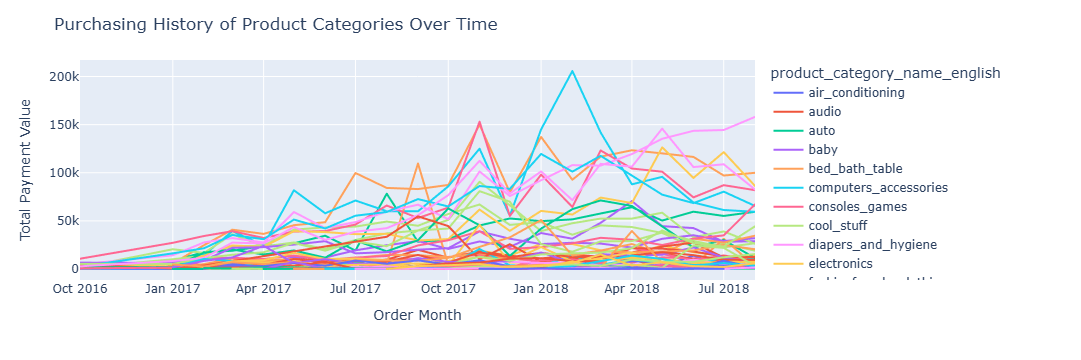

In [28]:
# Data preprocessing
Master_df['order_purchase_timestamp'] = pd.to_datetime(Master_df['order_purchase_timestamp'])
Master_df['order_month'] = Master_df['order_purchase_timestamp'].dt.to_period('M')
# Feature engineering
features = (
    Master_df.groupby(['order_month', 'product_category_name_english'])
    .agg({'payment_value': 'sum', 'product_id': 'count'})
    .reset_index()
    .rename(columns={'payment_value': 'total_payment', 'product_id': 'transaction_count'})
)

# Convert 'order_month' to string for serialization
features['order_month_str'] = features['order_month'].astype(str)

# Line plot for purchasing history
fig = px.line(features, x='order_month_str', y='total_payment', color='product_category_name_english', labels={'total_payment': 'Total Payment Value', 'order_month_str': 'Order Month'})
fig.update_layout(title='Purchasing History of Product Categories Over Time', xaxis_title='Order Month', yaxis_title='Total Payment Value')
fig.show()

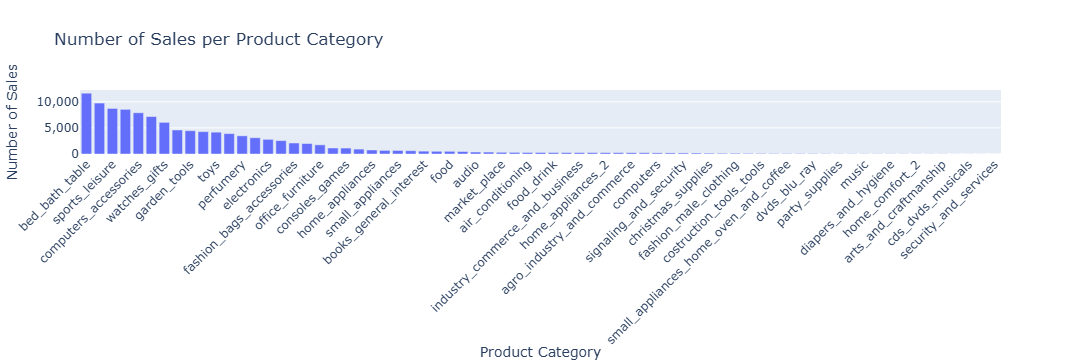

In [29]:
# Group by product category and count the number of sales (transactions)
sales_count = Master_df.groupby('product_category_name_english')['product_id'].count().reset_index()

# Sort categories by sales count
sales_count = sales_count.sort_values(by='product_id', ascending=False)

# Create an interactive bar chart using Plotly Express
fig = px.bar(
    sales_count,
    x='product_category_name_english',
    y='product_id',
    title='Number of Sales per Product Category',
    labels={'product_category_name_english': 'Product Category', 'product_id': 'Number of Sales'},
)

# Update y-axis format to display full numbers
fig.update_layout(xaxis_tickangle=-45, yaxis_tickformat=',d')

fig.show()

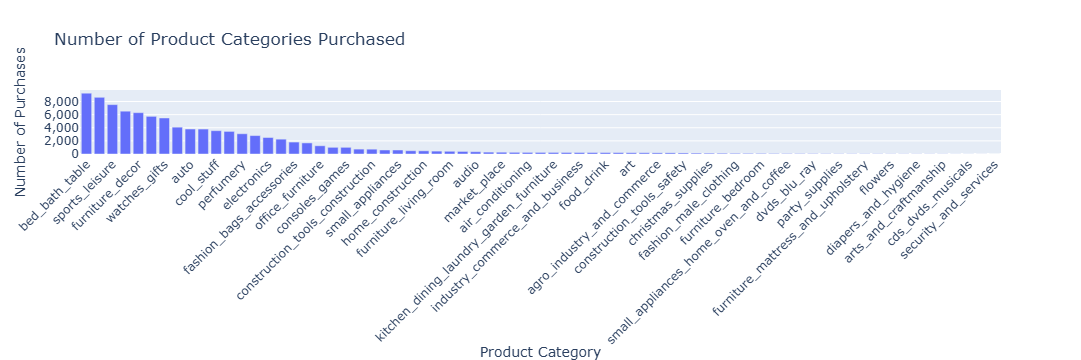

In [30]:
# Group by product category and count the number of purchases (unique order IDs)
categories_purchased = Master_df.groupby('product_category_name_english')['order_id'].nunique().reset_index()

# Sort categories by the number of purchases
categories_purchased = categories_purchased.sort_values(by='order_id', ascending=False)

# Create an interactive bar chart using Plotly Express
fig_categories_purchased = px.bar(
    categories_purchased,
    x='product_category_name_english',
    y='order_id',
    title='Number of Product Categories Purchased',
    labels={'product_category_name_english': 'Product Category', 'order_id': 'Number of Purchases'},
)

# Update y-axis format to display full numbers
fig_categories_purchased.update_layout(xaxis_tickangle=-45, yaxis_tickformat=',d')

fig_categories_purchased.show()


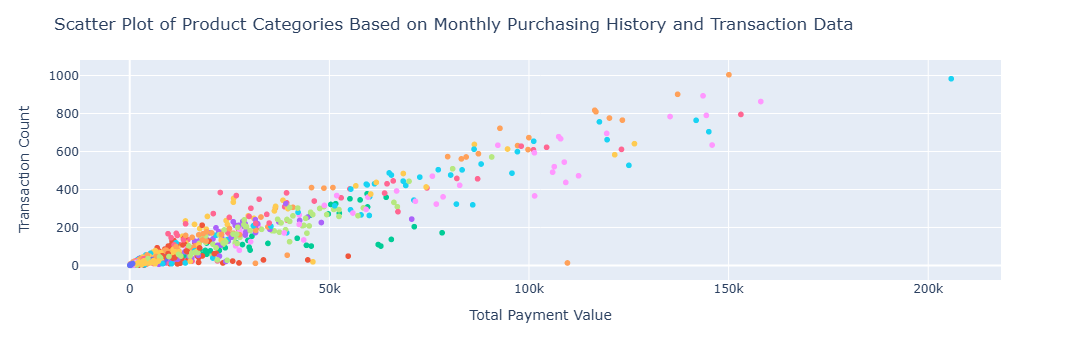

In [31]:

# Data preprocessing
Master_df['order_purchase_timestamp'] = pd.to_datetime(Master_df['order_purchase_timestamp'])
Master_df['order_month'] = Master_df['order_purchase_timestamp'].dt.to_period('M')

# Feature engineering
features = (
    Master_df.groupby(['order_month', 'product_category_name_english'])
    .agg({'payment_value': 'sum', 'product_id': 'count'})
    .reset_index()
    .rename(columns={'payment_value': 'total_payment', 'product_id': 'transaction_count'})
)

# Interactive visualization using plotly
category_colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(len(features['product_category_name_english'].unique()))]
features['color'] = features['product_category_name_english'].map(dict(zip(features['product_category_name_english'].unique(), category_colors)))

fig = px.scatter(
    features,
    x='total_payment',
    y='transaction_count',
    color='color',  # Use 'color' column for coloring without clustering
    hover_name='product_category_name_english',
    labels={'total_payment': 'Total Payment Value', 'transaction_count': 'Transaction Count'}
)
fig.update_layout(title='Scatter Plot of Product Categories Based on Monthly Purchasing History and Transaction Data', xaxis_title='Total Payment Value', yaxis_title='Transaction Count', showlegend=False)
fig.show()


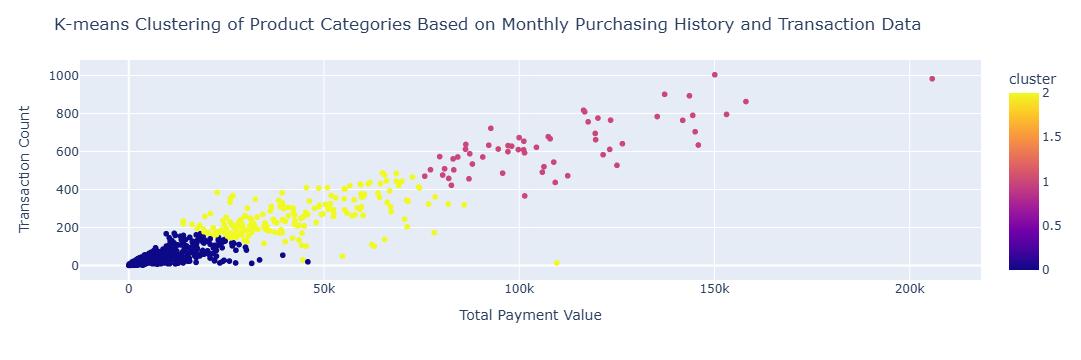

In [32]:
# Data preprocessing
Master_df['order_purchase_timestamp'] = pd.to_datetime(Master_df['order_purchase_timestamp'])
Master_df['order_month'] = Master_df['order_purchase_timestamp'].dt.to_period('M')

# Feature engineering
features = (
    Master_df.groupby(['order_month', 'product_category_name_english'])
    .agg({'payment_value': 'sum', 'product_id': 'count'})
    .reset_index()
    .rename(columns={'payment_value': 'total_payment', 'product_id': 'transaction_count'})
)

# Standardize features
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features[['total_payment', 'transaction_count']])

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(features_scaled)

# Add cluster labels to the original DataFrame
features['cluster'] = clusters

# Interactive visualization using plotly
category_colors = [f'#{random.randint(0, 0xFFFFFF):06x}' for _ in range(len(features['product_category_name_english'].unique()))]
features['color'] = features['product_category_name_english'].map(dict(zip(features['product_category_name_english'].unique(), category_colors)))

fig = px.scatter(
    features,
    x='total_payment',
    y='transaction_count',
    color='cluster',
    hover_name='product_category_name_english',
    color_discrete_map=dict(zip(features['cluster'].unique(), category_colors)),
    labels={'total_payment': 'Total Payment Value', 'transaction_count': 'Transaction Count'}
)
fig.update_layout(title='K-means Clustering of Product Categories Based on Monthly Purchasing History and Transaction Data', xaxis_title='Total Payment Value', yaxis_title='Transaction Count', showlegend=True)
fig.show()


# Sales Performance

In [33]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory  

In [34]:
customers = pd.read_csv('olist_customers_dataset.csv')
sellers = pd.read_csv('olist_sellers_dataset.csv')
geolocation = pd.read_csv('olist_geolocation_dataset.csv')
order_items = pd.read_csv('olist_order_items_dataset.csv')
order_payments = pd.read_csv('olist_order_payments_dataset.csv')
order_reviews = pd.read_csv('olist_order_reviews_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')
products = pd.read_csv('olist_products_dataset.csv')
product_category_name = pd.read_csv('product_category_name_translation.csv')   

order_items_products = pd.merge(order_items,products,on='product_id',how='outer')
order_items_products_sellers = pd.merge(order_items_products,sellers, on='seller_id',how='outer')
two_order_items_products_sellers = pd.merge(order_items_products_sellers,orders,on='order_id',how='outer')
two_order_items_products_sellers_customer = pd.merge(two_order_items_products_sellers,customers,on='customer_id',how='outer')
two_order_items_products_sellers_customer_reviews = pd.merge(two_order_items_products_sellers_customer,order_reviews,on='order_id',how='outer')
df = pd.merge(two_order_items_products_sellers_customer_reviews,order_payments,on='order_id',how='outer')

In [35]:
#Information about dataframe
df.head()     

df.describe()

df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119143 entries, 0 to 119142
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119143 non-null  object 
 1   order_item_id                  118310 non-null  float64
 2   product_id                     118310 non-null  object 
 3   seller_id                      118310 non-null  object 
 4   shipping_limit_date            118310 non-null  object 
 5   price                          118310 non-null  float64
 6   freight_value                  118310 non-null  float64
 7   product_category_name          116601 non-null  object 
 8   product_name_lenght            116601 non-null  float64
 9   product_description_lenght     116601 non-null  float64
 10  product_photos_qty             116601 non-null  float64
 11  product_weight_g               118290 non-null  float64
 12  product_length_cm             

In [36]:
#Counting missing values
null_values = df.isnull().sum()
null_values

#Check for duplicates row
duplicated_rows = df.duplicated().sum()
duplicated_rows

np.int64(0)

In [37]:
#remove rows with missing values in the specified subset of columns, and make new Data frame with the rows containing missing values in the specific columns removed
df_2 = df.dropna(subset = ['shipping_limit_date', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'review_creation_date', 'review_answer_timestamp','order_purchase_timestamp', 'order_approved_at'])

# counts of missing values in each column after the removal of specific rows.
null_values_df_2 = df_2.isnull().sum()
null_values_df_2

df_2.shape

(114845, 39)

In [38]:
from datetime import datetime

# Calculate purchase-delivery difference
intermediate_time = df_2['order_delivered_customer_date'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").date()) - df_2['order_purchase_timestamp'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").date())
df_2.loc[:, 'purchase-delivery difference'] = intermediate_time.apply(lambda x: x.days)

# Calculate estimated-actual delivery difference
intermediate_time = df_2['order_estimated_delivery_date'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").date()) - df_2['order_delivered_customer_date'].apply(lambda x: datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").date())
df_2.loc[:, 'estimated-actual delivery difference'] = intermediate_time.apply(lambda x: x.days)

df_2.info()

C:\Users\Chan Kok Han\AppData\Local\Temp\ipykernel_31684\4172645081.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Chan Kok Han\AppData\Local\Temp\ipykernel_31684\4172645081.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<class 'pandas.core.frame.DataFrame'>
Index: 114845 entries, 0 to 119142
Data columns (total 41 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   order_id                              114845 non-null  object 
 1   order_item_id                         114845 non-null  float64
 2   product_id                            114845 non-null  object 
 3   seller_id                             114845 non-null  object 
 4   shipping_limit_date                   114845 non-null  object 
 5   price                                 114845 non-null  float64
 6   freight_value                         114845 non-null  float64
 7   product_category_name                 113220 non-null  object 
 8   product_name_lenght                   113220 non-null  float64
 9   product_description_lenght            113220 non-null  float64
 10  product_photos_qty                    113220 non-null  float64
 11  produ

In [39]:
#Copy of dataframe2 for other uses
df_3 = df_2.copy()

# Fill missing values in 'product_category_name' with the mode
df_3.loc[:, 'product_category_name'].fillna(value=df_2['product_category_name'].mode()[0], inplace=True)

# Fill missing values in 'product_name_lenght' with the mode
df_3.loc[:, 'product_name_lenght'].fillna(value=df_2['product_name_lenght'].mode()[0], inplace=True)

# Fill missing values in 'product_description_lenght' with the median
df_3.loc[:, 'product_description_lenght'].fillna(value=df_2['product_description_lenght'].median(), inplace=True)

# Fill missing values in 'product_photos_qty' with the mode
df_3.loc[:, 'product_photos_qty'].fillna(value=df_2['product_photos_qty'].mode()[0], inplace=True)

# Fill missing values in 'product_weight_g' with the mode
df_3.loc[:, 'product_weight_g'].fillna(value=df_2['product_weight_g'].mode()[0], inplace=True)

# Fill missing values in 'product_length_cm' with the mode
df_3.loc[:, 'product_length_cm'].fillna(value=df_2['product_length_cm'].mode()[0], inplace=True)

# Fill missing values in 'product_height_cm' with the mode
df_3.loc[:, 'product_height_cm'].fillna(value=df_2['product_height_cm'].mode()[0], inplace=True)

# Fill missing values in 'product_width_cm' with the mode
df_3.loc[:, 'product_width_cm'].fillna(value=df_2['product_width_cm'].mode()[0], inplace=True)

# Fill missing values in 'review_comment_message' with 'indisponível'
df_3.loc[:, 'review_comment_message'].fillna(value='indisponível', inplace=True)

# Fill missing values in 'review_comment_title' with 'indisponível'
df_3.loc[:, 'review_comment_title'].fillna(value='indisponível', inplace=True)

#Check for null values
null_values_df_3 = df_3.isnull().sum()
null_values_df_3

df_3.describe()


C:\Users\Chan Kok Han\AppData\Local\Temp\ipykernel_31684\3612952369.py:5: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.



C:\Users\Chan Kok Han\AppData\Local\Temp\ipykernel_31684\3612952369.py:8: FutureWarning:

A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(v

,order_item_id,price,freight_value,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,seller_zip_code_prefix,customer_zip_code_prefix,review_score,payment_sequential,payment_installments,payment_value,purchase-delivery difference,estimated-actual delivery difference
count,114845.000000,114845.000000,114845.000000,114845.000000,114845.000000,114845.000000,114845.000000,114845.000000,114845.000000,114845.000000,114845.000000,114845.000000,114845.000000,114842.000000,114842.000000,114842.000000,114845.00000,114845.000000
mean,1.194636,119.768549,19.974205,48.948200,782.119195,2.189865,2103.045000,30.223614,16.570647,23.057904,24463.968349,35085.577134,4.080317,1.091578,2.938089,171.257124,12.38464,12.082189
std,0.685779,181.431471,15.704321,10.017477,646.041643,1.712045,3768.997268,16.112621,13.416398,11.725832,27596.202812,29874.482839,1.347799,0.688902,2.773839,263.781307,9.37644,10.097024
min,1.000000,0.850000,0.000000,5.000000,4.000000,1.000000,0.000000,7.000000,2.000000,6.000000,1001.000000,1003.000000,1.000000,1.000000,0.000000,0.000000,0.00000,-188.000000
25%,1.000000,39.900000,13.070000,43.000000,348.000000,1.000000,300.000000,18.000000,8.000000,15.000000,6429.000000,11250.000000,4.000000,1.000000,1.000000,60.720000,7.00000,7.000000
50%,1.000000,74.900000,16.280000,52.000000,600.000000,1.000000,700.000000,25.000000,13.000000,20.000000,13660.000000,24310.000000,5.000000,1.000000,2.000000,108.000000,10.00000,13.000000
75%,1.000000,132.900000,21.150000,57.000000,976.000000,3.000000,1800.000000,38.000000,20.000000,30.000000,28035.000000,58884.000000,5.000000,1.000000,4.000000,188.690000,15.00000,17.000000
max,21.000000,6735.000000,409.680000,76.000000,3992.000000,20.000000,40425.000000,105.000000,105.000000,118.000000,99730.000000,99980.000000,5.000000,26.000000,24.000000,13664.080000,208.00000,147.000000


In [40]:

#Remove rows with missing values
df_4 = df_3.dropna(subset = ['payment_sequential','payment_type', 'payment_installments','payment_value' ])
null_values_df_4 = df_4.isnull().sum()
null_values_df_4

df_4.shape

df_4.describe()

df_4.loc['price_category'] = df_4['price'].apply(lambda x:'expensive' if x>=132.9 else ('affordable' if x>=39.9 and x<132.9 else 'cheap'))

df_4['order_status'].value_counts()
(len(df_4[df_4["order_status"] == "canceled"]) / len(df_4["order_status"])) * 100


C:\Users\Chan Kok Han\AppData\Local\Temp\ipykernel_31684\3472605431.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0.006095277901134593

In [41]:

df_5 = df_4.merge(product_category_name, on='product_category_name', how='left')

# Replace the original 'product_category_name' column with the translated names
df_5['product_category_name'] = df_5['product_category_name_english']

df_5.columns

#average 'purchase-delivery difference' for each product category, providing insights into the delivery time for different types of products.
category_mean_diff = df_5.groupby('product_category_name')['purchase-delivery difference'].mean()

# Group the data by 'product_category_name' and count the number of purchases per category
most_bought_category = df_5['product_category_name'].value_counts()


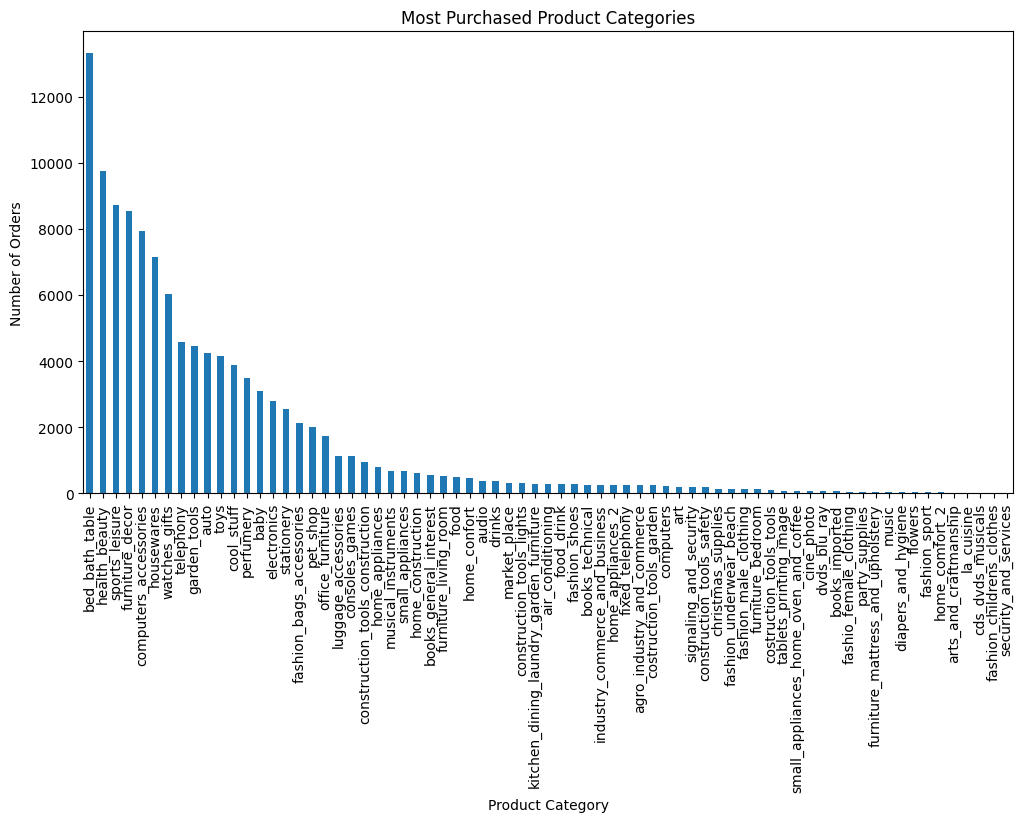

In [42]:
# Create a bar plot
plt.figure(figsize=(12, 6))
most_bought_category.plot(kind='bar')
plt.xlabel('Product Category')
plt.ylabel('Number of Orders')
plt.title('Most Purchased Product Categories')
plt.show()

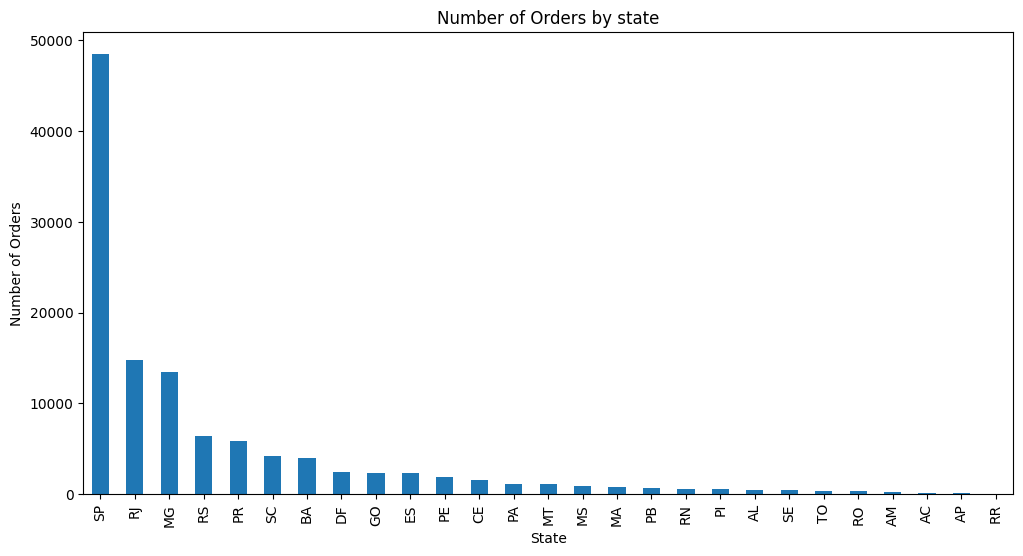

In [43]:
# Group by 'geolocation_city' and count the number of orders in each city
city_order_counts = df_4['customer_state'].value_counts()

# Create a bar plot
plt.figure(figsize=(12, 6))
city_order_counts.plot(kind='bar')
plt.xlabel('State')
plt.ylabel('Number of Orders')
plt.title('Number of Orders by state')
plt.xticks(rotation=90) 
plt.show()

C:\Users\Chan Kok Han\AppData\Local\Temp\ipykernel_31684\2037681118.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\Chan Kok Han\AppData\Local\Temp\ipykernel_31684\2037681118.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



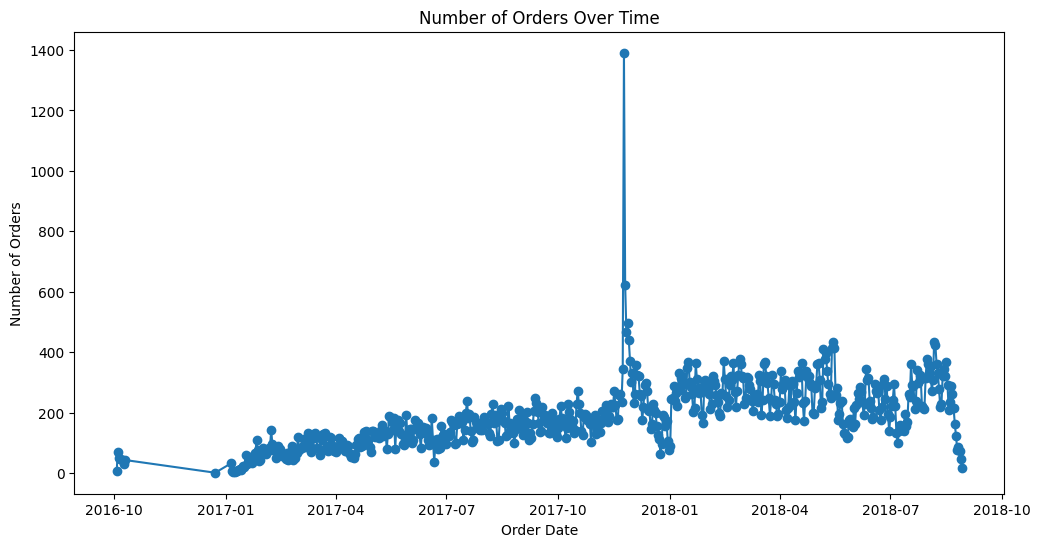

In [44]:
# Convert 'order_purchase_timestamp' to datetime format
df_4['order_purchase_timestamp'] = pd.to_datetime(df_4['order_purchase_timestamp'])

# Extract date from timestamp
df_4['order_date'] = df_4['order_purchase_timestamp'].dt.date

# Group by 'order_date' and count the number of orders per day
daily_order_counts = df_4['order_date'].value_counts().sort_index()

# Create a line plot
plt.figure(figsize=(12, 6))
daily_order_counts.plot(kind='line', marker='o')
plt.xlabel('Order Date')
plt.ylabel('Number of Orders')
plt.title('Number of Orders Over Time')
plt.show()


# Sales Trend

In [45]:
import pandas as pd 
import regex as re
import numpy as np
import seaborn as sns
import plotly.express as px
import datetime as dt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
%matplotlib inline

In [46]:
#Load the datasets:
items_order = pd.read_csv('olist_order_items_dataset.csv')
payments_order = pd.read_csv('olist_order_payments_dataset.csv')
orders = pd.read_csv('olist_orders_dataset.csv')

In [47]:
items_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [48]:
items_order.duplicated().sum()


np.int64(0)

In [49]:
#Convert order_item_id to string object
items_order["order_item_id"] = items_order['order_item_id'].astype('str')

#Convert shipping_limit_date to datetime
items_order["shipping_limit_date"] = pd.to_datetime(items_order["shipping_limit_date"])

In [50]:
#Confirm the datatype change
items_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             112650 non-null  object        
 1   order_item_id        112650 non-null  object        
 2   product_id           112650 non-null  object        
 3   seller_id            112650 non-null  object        
 4   shipping_limit_date  112650 non-null  datetime64[ns]
 5   price                112650 non-null  float64       
 6   freight_value        112650 non-null  float64       
dtypes: datetime64[ns](1), float64(2), object(4)
memory usage: 6.0+ MB


In [51]:
payments_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [52]:
payments_order.duplicated().sum()

np.int64(0)

In [53]:
payments_order.isna().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [54]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [55]:
orders.duplicated().sum()


np.int64(0)

In [56]:
#Check orders df for null values()
orders.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [57]:
#Update timestamp columns to the correct datatype
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'])
orders['order_approved_at'] = pd.to_datetime(orders['order_approved_at'])
orders['order_delivered_carrier_date'] = pd.to_datetime(orders['order_delivered_carrier_date'])
orders['order_delivered_customer_date'] = pd.to_datetime(orders['order_delivered_customer_date'])
orders['order_estimated_delivery_date'] = pd.to_datetime(orders['order_estimated_delivery_date'])

In [58]:
#Confirm the datatype change for timestamp coolumns
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [59]:
#Review rows with no approved dates
unapproved = orders[orders['order_approved_at'].isna()]
unapproved.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
1130,00b1cb0320190ca0daa2c88b35206009,3532ba38a3fd242259a514ac2b6ae6b6,canceled,2018-08-28 15:26:39,NaT,NaT,NaT,2018-09-12
1801,ed3efbd3a87bea76c2812c66a0b32219,191984a8ba4cbb2145acb4fe35b69664,canceled,2018-09-20 13:54:16,NaT,NaT,NaT,2018-10-17
1868,df8282afe61008dc26c6c31011474d02,aa797b187b5466bc6925aaaa4bb3bed1,canceled,2017-03-04 12:14:30,NaT,NaT,NaT,2017-04-10
2029,8d4c637f1accf7a88a4555f02741e606,b1dd715db389a2077f43174e7a675d07,canceled,2018-08-29 16:27:49,NaT,NaT,NaT,2018-09-13
2161,7a9d4c7f9b068337875b95465330f2fc,7f71ae48074c0cfec9195f88fcbfac55,canceled,2017-05-01 16:12:39,NaT,NaT,NaT,2017-05-30


In [60]:
#Confirming the order status of orders without approved dates
unapproved.order_status.value_counts().reset_index()

,order_status,count
0,canceled,141
1,delivered,14
2,created,5


In [61]:
#Extract unapproved but delivered orders
unapproved_delivered = ((orders['order_approved_at'].isna()) & (orders['order_status'] == 'delivered'))

#Update approval time for delivered orders to purchase time.
orders.loc[unapproved_delivered, "order_approved_at"]= orders.loc[unapproved_delivered, "order_purchase_timestamp"]
orders.loc[unapproved_delivered,:]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,2017-02-18 14:40:00,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,2017-02-18 12:45:31,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,2017-02-18 13:29:47,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17
22663,5cf925b116421afa85ee25e99b4c34fb,29c35fc91fc13fb5073c8f30505d860d,delivered,2017-02-18 16:48:35,2017-02-18 16:48:35,2017-02-22 11:23:10,2017-03-09 07:28:47,2017-03-31
23156,12a95a3c06dbaec84bcfb0e2da5d228a,1e101e0daffaddce8159d25a8e53f2b2,delivered,2017-02-17 13:05:55,2017-02-17 13:05:55,2017-02-22 11:23:11,2017-03-02 11:09:19,2017-03-20
26800,c1d4211b3dae76144deccd6c74144a88,684cb238dc5b5d6366244e0e0776b450,delivered,2017-01-19 12:48:08,2017-01-19 12:48:08,2017-01-25 14:56:50,2017-01-30 18:16:01,2017-03-01
38290,d69e5d356402adc8cf17e08b5033acfb,68d081753ad4fe22fc4d410a9eb1ca01,delivered,2017-02-19 01:28:47,2017-02-19 01:28:47,2017-02-23 03:11:48,2017-03-02 03:41:58,2017-03-27
39334,d77031d6a3c8a52f019764e68f211c69,0bf35cac6cc7327065da879e2d90fae8,delivered,2017-02-18 11:04:19,2017-02-18 11:04:19,2017-02-23 07:23:36,2017-03-02 16:15:23,2017-03-22
48401,7002a78c79c519ac54022d4f8a65e6e8,d5de688c321096d15508faae67a27051,delivered,2017-01-19 22:26:59,2017-01-19 22:26:59,2017-01-27 11:08:05,2017-02-06 14:22:19,2017-03-16
61743,2eecb0d85f281280f79fa00f9cec1a95,a3d3c38e58b9d2dfb9207cab690b6310,delivered,2017-02-17 17:21:55,2017-02-17 17:21:55,2017-02-22 11:42:51,2017-03-03 12:16:03,2017-03-20


In [62]:
#Review rows with no carrier dates
non_carrier = orders[orders['order_delivered_carrier_date'].isna()]
non_carrier.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
266,8e24261a7e58791d10cb1bf9da94df5c,64a254d30eed42cd0e6c36dddb88adf0,unavailable,2017-11-16 15:09:28,2017-11-16 15:26:57,NaT,NaT,2017-12-05
324,d3c8851a6651eeff2f73b0e011ac45d0,957f8e082185574de25992dc659ebbc0,processing,2016-10-05 22:44:13,2016-10-06 15:51:05,NaT,NaT,2016-12-09


In [63]:
#Confirming the order status of orders without carrier dates
non_carrier.order_status.value_counts()

order_status
unavailable    609
canceled       550
invoiced       314
processing     301
created          5
approved         2
delivered        2
Name: count, dtype: int64

In [64]:
#Confirm delivery status of rows withou carrier dates
non_carrier.query("order_status == 'delivered'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,NaT,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23


In [65]:
#Extract delivered orders without carrier dates
delivered_noncarrier = (orders['order_delivered_carrier_date'].isna()) & (orders['order_status'] == 'delivered')

#Update carrier time for delivered orders to purchase time
orders.loc[delivered_noncarrier, "order_delivered_carrier_date"] = orders.loc[delivered_noncarrier, "order_purchase_timestamp"]
orders.loc[delivered_noncarrier, :]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
73222,2aa91108853cecb43c84a5dc5b277475,afeb16c7f46396c0ed54acb45ccaaa40,delivered,2017-09-29 08:52:58,2017-09-29 09:07:16,2017-09-29 08:52:58,2017-11-20 19:44:47,2017-11-14
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,NaT,2017-06-23


In [66]:
##Review rows with no delivery dates
undelivered = orders[orders['order_delivered_customer_date'].isna()]
undelivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaT,2018-06-28
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaT,NaT,2018-08-21
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaT,NaT,2017-10-03
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaT,2018-02-07


In [67]:
#Confirming the order status of orders without delivery dates
undelivered.order_status.value_counts()

order_status
shipped        1107
canceled        619
unavailable     609
invoiced        314
processing      301
delivered         8
created           5
approved          2
Name: count, dtype: int64

In [68]:
undelivered.query("order_status == 'delivered'")


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


In [69]:
#Compute delivery time
avg_delivery_time= (orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"]).mean()
avg_delivery_time

Timedelta('9 days 07:56:37.872558978')

In [70]:
#Extract delivered orders without delivery dates
delivered_nodelivery_date = (orders["order_delivered_customer_date"].isna() & (orders["order_status"] == 'delivered'))

In [71]:
#Replace non_delivery dates with a sum of the carrier date and the average delivery time
orders.loc[delivered_nodelivery_date,"order_delivered_customer_date"] = orders.loc[delivered_nodelivery_date,"order_delivered_carrier_date"] + avg_delivery_time
orders.loc[delivered_nodelivery_date,:]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,2017-12-10 02:09:00.872558978,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,2018-07-04 16:01:37.872558978,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,2018-07-12 21:53:37.872558978,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,2018-07-12 21:53:37.872558978,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,2018-07-12 17:24:37.872558978,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,2017-05-25 23:22:43,2017-06-04 07:19:20.872558978,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,2018-06-21 22:06:37.872558978,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,2018-07-13 03:22:37.872558978,2018-07-19


In [72]:
# Compute delivery duration in days and hours for all orders
orders["delivery_duration"] = (orders["order_delivered_customer_date"] - orders["order_delivered_carrier_date"])
orders["delivery_hours"] = orders["delivery_duration"]/ dt.timedelta(hours=1)
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,delivery_duration,delivery_hours
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,6 days 01:30:13,145.503611
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,12 days 00:56:45,288.945833
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,9 days 04:16:29,220.274722
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,9 days 10:48:43,226.811944
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,1 days 22:30:28,46.507778


In [73]:
orders.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype          
---  ------                         --------------  -----          
 0   order_id                       99441 non-null  object         
 1   customer_id                    99441 non-null  object         
 2   order_status                   99441 non-null  object         
 3   order_purchase_timestamp       99441 non-null  datetime64[ns] 
 4   order_approved_at              99295 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   97660 non-null  datetime64[ns] 
 6   order_delivered_customer_date  96484 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns] 
 8   delivery_duration              96484 non-null  timedelta64[ns]
 9   delivery_hours                 96484 non-null  float64        
dtypes: datetime64[ns](5), float64(1), object(3), timedelta64[ns](1)
memory

In [74]:
#Create Master df
Master_df = orders.merge(payments_order, on="order_id") \
.merge(items_order, on="order_id")
#Confirm shape and datatype of master df
Master_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117601 entries, 0 to 117600
Data columns (total 20 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_id                       117601 non-null  object         
 1   customer_id                    117601 non-null  object         
 2   order_status                   117601 non-null  object         
 3   order_purchase_timestamp       117601 non-null  datetime64[ns] 
 4   order_approved_at              117601 non-null  datetime64[ns] 
 5   order_delivered_carrier_date   116358 non-null  datetime64[ns] 
 6   order_delivered_customer_date  115042 non-null  datetime64[ns] 
 7   order_estimated_delivery_date  117601 non-null  datetime64[ns] 
 8   delivery_duration              115042 non-null  timedelta64[ns]
 9   delivery_hours                 115042 non-null  float64        
 10  payment_sequential             117601 non-null  int64   

In [75]:
#Checking null values
Master_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   0
order_delivered_carrier_date     1243
order_delivered_customer_date    2559
order_estimated_delivery_date       0
delivery_duration                2559
delivery_hours                   2559
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
dtype: int64

In [76]:
# Drop rows with null values
Master_df.dropna(inplace=True)

In [77]:
#Checking null values again
Master_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
delivery_duration                0
delivery_hours                   0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
dtype: int64

In [78]:
#Check for duplicate rows
Master_df.duplicated().sum()

np.int64(0)

In [79]:
#Drop duplicate rows if any
Master_df.drop_duplicates(inplace=True)

#Confirm there are no duplicate rows
Master_df.duplicated().sum()

np.int64(0)

In [80]:
#Confirmimg rows without carrier (pick-up) and delivery date
ad = Master_df[(Master_df['order_delivered_carrier_date'].isna()) | (Master_df['order_delivered_customer_date'].isna())]
ad['order_status'].value_counts()

Series([], Name: count, dtype: int64)

In [81]:
#Remove columns of object data types
Model_df = Master_df.select_dtypes(exclude= object)
Model_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 115042 entries, 0 to 117600
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype          
---  ------                         --------------   -----          
 0   order_purchase_timestamp       115042 non-null  datetime64[ns] 
 1   order_approved_at              115042 non-null  datetime64[ns] 
 2   order_delivered_carrier_date   115042 non-null  datetime64[ns] 
 3   order_delivered_customer_date  115042 non-null  datetime64[ns] 
 4   order_estimated_delivery_date  115042 non-null  datetime64[ns] 
 5   delivery_duration              115042 non-null  timedelta64[ns]
 6   delivery_hours                 115042 non-null  float64        
 7   payment_sequential             115042 non-null  int64          
 8   payment_installments           115042 non-null  int64          
 9   payment_value                  115042 non-null  float64        
 10  shipping_limit_date            115042 non-null  datetime64[ns

In [82]:
#Dropping other irrelevant date columns except the purchase date
Model_df.drop(columns=["order_delivered_carrier_date", "order_delivered_customer_date", "order_estimated_delivery_date", "delivery_duration", "shipping_limit_date", "order_approved_at"], axis=1, inplace=True)

In [83]:
#Group the model dataset by the purchase date
Model_df = Model_df.groupby("order_purchase_timestamp").mean()

In [84]:
#Confirm the presence of null values
Model_df.isna().sum()

#Drop null rows if present
Model_df.dropna(inplace=True)

In [85]:
Model_df.info()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 95961 entries, 2016-10-03 09:44:50 to 2018-08-29 15:00:37
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   delivery_hours        95961 non-null  float64
 1   payment_sequential    95961 non-null  float64
 2   payment_installments  95961 non-null  float64
 3   payment_value         95961 non-null  float64
 4   price                 95961 non-null  float64
 5   freight_value         95961 non-null  float64
dtypes: float64(6)
memory usage: 5.1 MB


In [86]:
#Check for duplicate rows
Model_df.duplicated().sum()

np.int64(6)

In [87]:
#Drop duplicate rows if any
Model_df.drop_duplicates(inplace=True)

#Confirm there are no duplicate rows
Model_df.duplicated().sum()

np.int64(0)

In [88]:
# Extract predictor and target variables
y = Model_df["payment_value"]
X = Model_df.drop("payment_value", axis=1)


In [89]:
#Seperate train and test values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [90]:
#Build Random Forest Model
forest_model = RandomForestRegressor(random_state=1)

#Fit Model to train dataset
forest_model.fit(X_train, y_train)

#Use fitted model to predict sales
sales_preds = forest_model.predict(X_valid)
print(mean_absolute_error(y_valid, sales_preds))
print(r2_score(y_valid, sales_preds))
print(mean_squared_error(y_valid, sales_preds))

24.732647463121758
0.8616809409491719
6251.319053637032


In [91]:
#Build Decision Tree Model
decision_model = DecisionTreeRegressor(random_state=1, max_leaf_nodes=500)

#Fit Model to train dataset
decision_model.fit(X_train, y_train)

#Use fitted model to predict sales
sales_preds2 = decision_model.predict(X_valid)
print(mean_absolute_error(y_valid, sales_preds2))
print(r2_score(y_valid, sales_preds2))
print(mean_squared_error(y_valid, sales_preds2))

26.282410271329628
0.6610981683558932
15316.641770175564


In [92]:
#Comparing the sales prediction from the different models to the train dataset
compared_df = y_valid.reset_index()
compared_df["Rf"] = sales_preds
compared_df["DT"] = sales_preds2
compared_df.head(7)

,order_purchase_timestamp,payment_value,Rf,DT
0,2017-09-08 12:16:48,313.43,197.33235,205.226923
1,2017-08-15 23:50:39,220.02,80.86810,88.775819
2,2017-11-19 21:06:33,72.70,39.46580,43.909228
3,2017-08-11 17:17:17,122.10,61.80450,65.303845
4,2018-06-17 19:37:41,58.38,58.51390,74.340487
5,2018-01-22 14:14:28,66.69,67.35830,74.340487
6,2018-05-17 14:08:35,131.56,147.57020,157.999679


C:\Users\Chan Kok Han\AppData\Local\Temp\ipykernel_31684\629373437.py:22: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



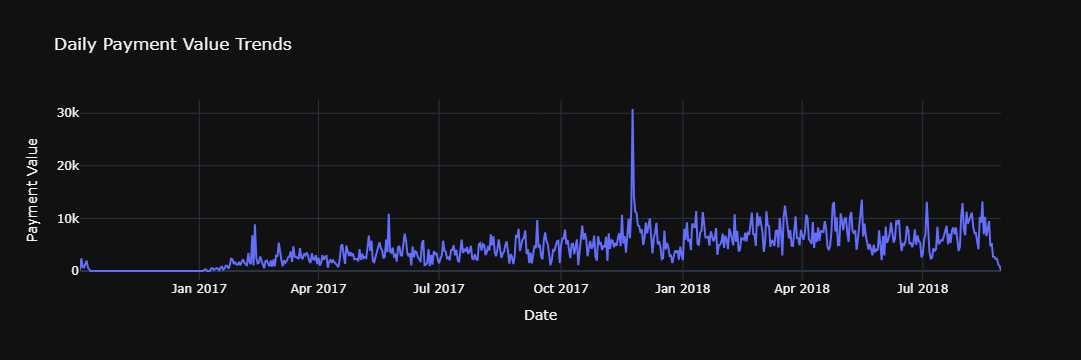

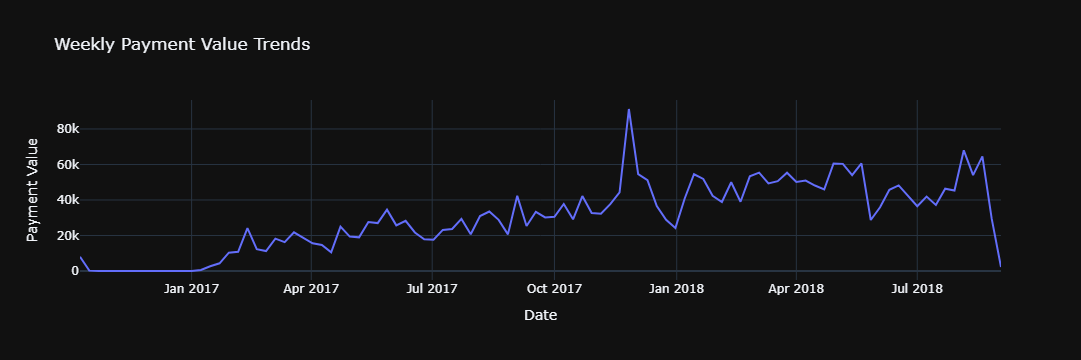

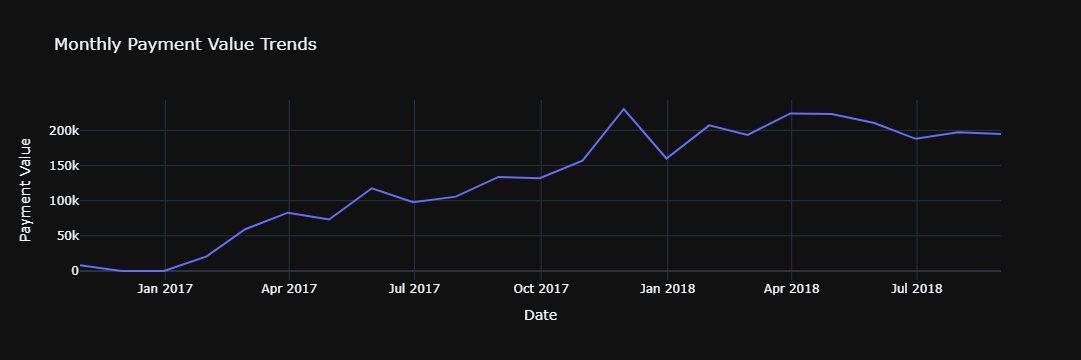

In [93]:
# Use the Decision Tree model to make predictions
decision_preds = decision_model.predict(X_valid)

# Use the Random Forest model to make predictions
forest_preds = forest_model.predict(X_valid)

# Create a copy of the validation set with the payment values
validation_data = X_valid.copy()
validation_data["payment_value"] = y_valid

# Create a DataFrame for predictions
prediction_df = pd.DataFrame({
    "Date": validation_data.index,
    "Actual": validation_data["payment_value"],
    "Decision Tree Predictions": decision_preds,
    "Random Forest Predictions": forest_preds
})

# Resample the data to daily, weekly, and monthly levels
daily_data = prediction_df.resample('D', on="Date").sum().reset_index()
weekly_data = prediction_df.resample('W', on="Date").sum().reset_index()
monthly_data = prediction_df.resample('M', on="Date").sum().reset_index()

# Create interactive plots using plotly.express
fig_daily = px.line(daily_data, x="Date", y="Actual", labels={"Actual": "Payment Value"},
                    title="Daily Payment Value Trends", template="plotly_dark",
                    hover_data={"Actual": ":,.2f"})
fig_daily.update_layout(xaxis_title="Date", yaxis_title="Payment Value")

fig_weekly = px.line(weekly_data, x="Date", y="Actual", labels={"Actual": "Payment Value"},
                     title="Weekly Payment Value Trends", template="plotly_dark",
                     hover_data={"Actual": ":,.2f"})
fig_weekly.update_layout(xaxis_title="Date", yaxis_title="Payment Value")

fig_monthly = px.line(monthly_data, x="Date", y="Actual", labels={"Actual": "Payment Value"},
                      title="Monthly Payment Value Trends", template="plotly_dark",
                      hover_data={"Actual": ":,.2f"})
fig_monthly.update_layout(xaxis_title="Date", yaxis_title="Payment Value")

# Show the plots
fig_daily.show()
fig_weekly.show()
fig_monthly.show()


C:\Users\Chan Kok Han\AppData\Local\Temp\ipykernel_31684\249729866.py:16: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



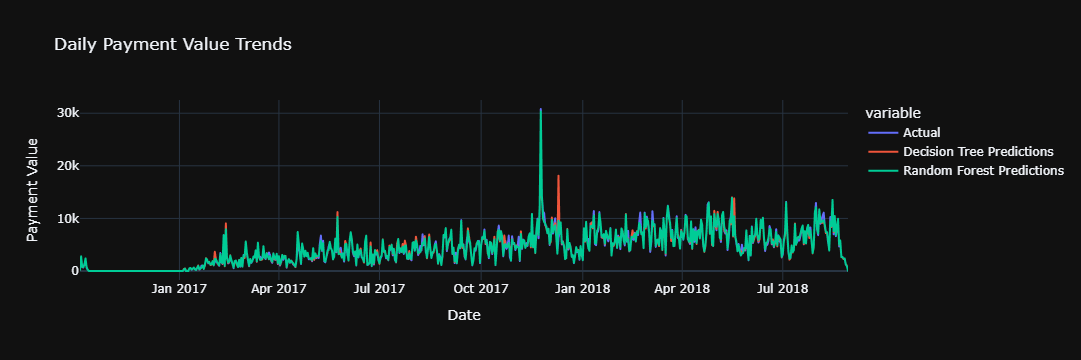

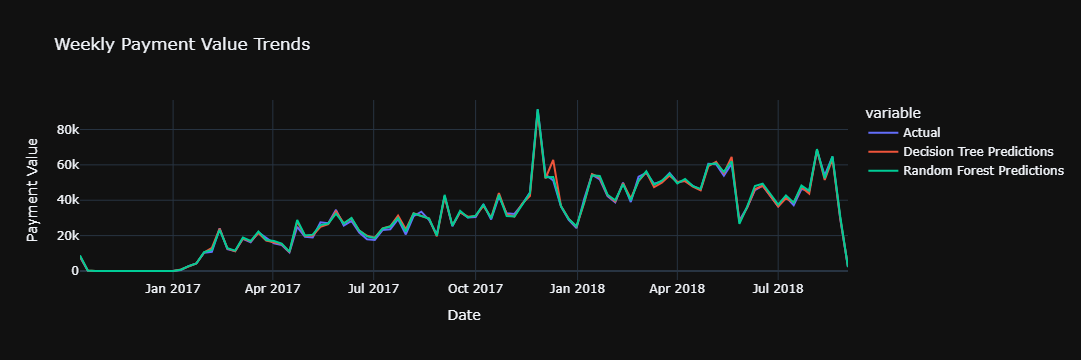

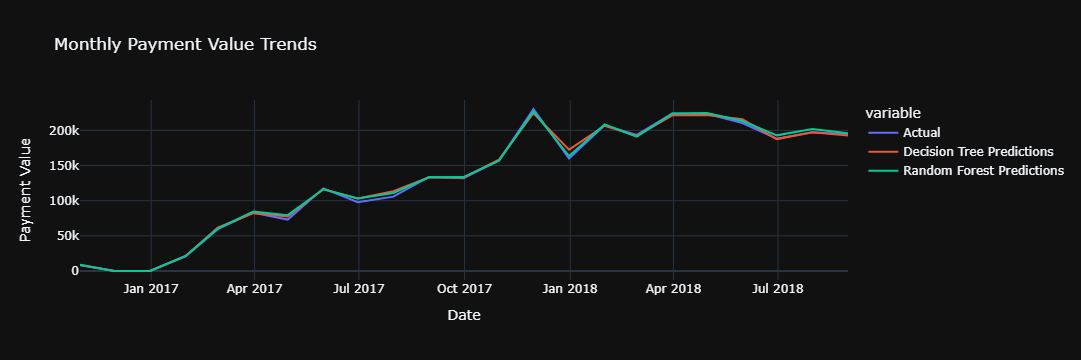

In [94]:
# Create a copy of the validation set with the payment values
validation_data = X_valid.copy()
validation_data["payment_value"] = y_valid

# Create a DataFrame for predictions
prediction_df = pd.DataFrame({
    "Date": validation_data.index,
    "Actual": validation_data["payment_value"],
    "Decision Tree Predictions": decision_preds,
    "Random Forest Predictions": forest_preds
})

# Resample the data to daily, weekly, and monthly levels
daily_data = prediction_df.resample('D', on="Date").sum().reset_index()
weekly_data = prediction_df.resample('W', on="Date").sum().reset_index()
monthly_data = prediction_df.resample('M', on="Date").sum().reset_index()

# Create interactive plots using plotly.express
fig_daily = px.line(daily_data, x="Date", y=["Actual", "Decision Tree Predictions", "Random Forest Predictions"],
                    labels={"value": "Payment Value"},
                    title="Daily Payment Value Trends", template="plotly_dark",
                    hover_data={"value": ":,.2f"})
fig_daily.update_layout(xaxis_title="Date", yaxis_title="Payment Value")

fig_weekly = px.line(weekly_data, x="Date", y=["Actual", "Decision Tree Predictions", "Random Forest Predictions"],
                     labels={"value": "Payment Value"},
                     title="Weekly Payment Value Trends", template="plotly_dark",
                     hover_data={"value": ":,.2f"})
fig_weekly.update_layout(xaxis_title="Date", yaxis_title="Payment Value")

fig_monthly = px.line(monthly_data, x="Date", y=["Actual", "Decision Tree Predictions", "Random Forest Predictions"],
                      labels={"value": "Payment Value"},
                      title="Monthly Payment Value Trends", template="plotly_dark",
                      hover_data={"value": ":,.2f"})
fig_monthly.update_layout(xaxis_title="Date", yaxis_title="Payment Value")

# Show the plots
fig_daily.show()
fig_weekly.show()
fig_monthly.show()
